Oppgave 1 a)

$$ \frac{\partial}{\partial t}  \varphi  \big(x, t\big) = D  \frac{\partial^2}{\partial x^2} \varphi  \big(x, t\big) $$
hvor D er en konstant. Antar at partikkeltettheten $\varphi$ er en normal sansynlightesfordeling med forventningsverdi  $\mu = 0$, og varians $ \sigma ^{2} = at$. Partikkeltetthet vil da kunne skrives som:  $$ \varphi  \big(x, t\big) = \frac{1}{ \sqrt{2  \pi a t} } exp \big\{- \frac{1}{2}  \frac{ x^{2} }{at} \big\} $$ Partiellderiverer med hennsyn på tid og posisjon gir oss:  $$ \frac{1}{2} = D  \;\;\;\;\;\;\;;\;\;\;\;\;\; \frac{1}{2a} = D \frac{1}{2  a^{2} }  $$ som betyr at $a = 1$

In [7]:
import numpy as np
import matplotlib.pyplot as plt 
from matplotlib.animation import FuncAnimation
from scipy.optimize import curve_fit 
import datetime
from numba import jit 
from IPython.display import HTML

dt = 1
dx = 1

Oppgave 1 b)

In [8]:
def bm_1d(steps,pr):
    """
    Simple brownian motion in 1D 
    
    Parameters: 
        int steps - number of timesteps
        float pr - probability of moving to the right
    Returns:
        array t - array with the timesteps 
        array x = array with the positions as function of time 
   
    """
    
    t = np.arange(0,steps*dt,dt)
    x = np.zeros(steps)
    rand = np.random.choice([-1,1],steps,p=[1-pr,pr])
    for i in range(0,steps):
        x[i]=x[i-1]+rand[i]
    
    return t,x

Oppgave 1 c)

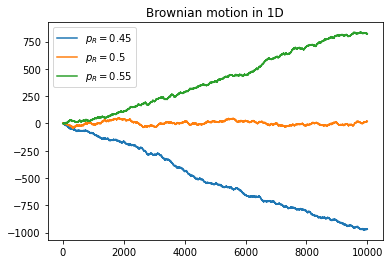

In [9]:
pr=[0.45,0.5,0.55]
M = 10000
t,x = bm_1d(M, pr[0]);

plt.figure(0);
plt.plot(t,x, label = f"$p_R = {pr[0]}$");

t,x = bm_1d(M, pr[1]);
plt.plot(t,x, label = f"$p_R = {pr[1]}$");

t,x = bm_1d(M, pr[2]);
plt.plot(t,x, label = f"$p_R = {pr[2]}$");

plt.title("Brownian motion in 1D")
plt.legend()

Oppgave 1 d)

0:00:01.298264


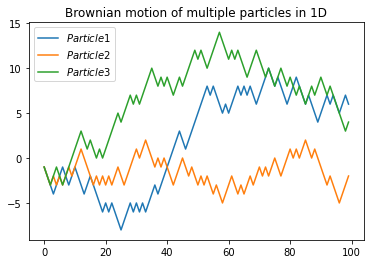

In [10]:
@jit(forceobj=True)
def bm_mult(N,steps,pr):
    
    pos = np.zeros([N,steps]);
    t = np.arange(0,steps*dt,dt);
    rand = np.random.choice([-1,1],[N,steps],p=[1-pr,pr])

    for i in range(0,N):
        for j in range(0,steps):
            pos[i][j]=pos[i][j-1]+rand[i][j]
        
    return t, pos

start_time = datetime.datetime.now()

t,x = bm_mult(1000, 100, 0.5)

plt.figure(1);
plt.plot(t,x[0], label = "$Particle 1$");
plt.plot(t,x[1], label = "$Particle 2$");
plt.plot(t,x[2], label = "$Particle 3$");

plt.title("Brownian motion of multiple particles in 1D")
plt.legend()
    
end_time = datetime.datetime.now()
print(end_time - start_time)

Oppgave 1 e)


Det er mulig å untynne egenskapene til at fåre directions kan kun være opp eller ned. Hvis vi ikke er interesserte i posisjon til enver tidssteg, er det muli å skippe over et bestemt antall regninger la oss si 10. Vi slicer deretter en del av directionlisten og finner summen av den. Hvis av 10 directions var 6 til høyre, blir summen da 6. Så vi kan oppdatere 1 gang med 6*dx og spare tid. 

Oppgave 1 f)

array([ 1.00067668,  1.89244845,  2.99459459,  4.01872272,  4.81191191,
        5.86929329,  6.59058659,  7.47933534,  8.38124525,  9.33643644,
       10.18778779, 11.19319319, 11.91846246, 13.27437838, 13.99604004,
       15.0021021 , 15.53993994, 16.86813213, 17.62472472, 18.48594194,
       19.42114515, 20.51154755, 20.96528128, 22.2136977 , 23.04064064,
       23.78265866, 24.53767367, 25.36642242, 26.52376777, 27.38673073,
       28.55457057, 28.99471872, 29.64667067, 30.30659059, 31.37779379,
       32.67227227, 33.56844444, 34.37927528, 35.83973974, 36.70357958,
       37.28303904, 38.40600601, 39.19079079, 39.67916316, 40.87793393,
       42.0224985 , 42.1041041 , 42.72717117, 43.58308709, 44.65675275,
       46.34278679, 46.89200801, 48.09737337, 49.06816817, 49.61671672,
       49.58076476, 49.46371972, 50.66160561, 51.69184785, 52.33425025,
       53.47581181, 54.57079479, 55.54128529, 55.61747347, 56.78918919,
       58.15943544, 58.52568969, 59.67957958, 61.50181782, 62.85

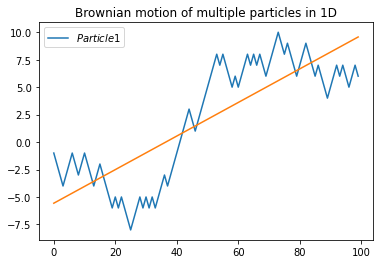

In [11]:
def f(x,a,b):
    return a * x + b

popt, pcov = curve_fit(f, t, x[0])

plt.figure(2)
plt.plot(t,x[0], label = "$Particle 1$")
plt.plot(t,f(t,popt[0],popt[1]))    
plt.title("Brownian motion of multiple particles in 1D")
plt.legend()

def empirical_var(t,x):
    """
    DONT TOUCH! IT WORKS!
    """
    s=np.zeros(len(t))
    x_average = np.zeros(len(t))   
    
    for i in range(0,len(t)):
        res=0
        x_average[i] = np.average(x.T[i])
        res=np.sum((x.T[i]-x_average[i])**2)
        s[i]=(res/(len(x)-1))
    return s

empirical_var(t, x)

Oppgave 1 g)

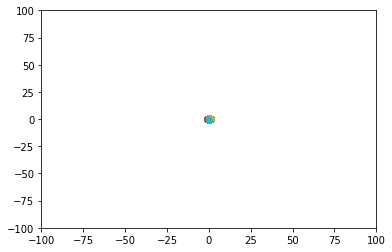

In [12]:
N=100
M=100
pu=0.5
pr=0.5

def bm_2d(N,M,pu,pr):
    t = np.arange(0,M*dt,dt)
    pos2D = np.zeros([N,2,M])
    rand_hv = np.random.choice([0,1],[N,M],p=[1-pu,pu]) 
    rand_lr = np.random.choice([-dx,dx],[N,M],p=[1-pr,pr])
    for i in range(0,N):
        for j in range(0,M):
            pos2D[i][rand_hv[i][j]][j]=pos2D[i][rand_hv[i][j]][j-1]+rand_lr[i][j]
            pos2D[i][rand_hv[i][j]-1][j]=pos2D[i][rand_hv[i][j]-1][j-1]

    return t, pos2D

t,pos2D = bm_2d(N,M,pu,pr)

def animate_particle(t,pos2D, dt):
    fig, ax = plt.subplots()
    graph = []
    ax.set_ylim(-100,100)
    ax.set_xlim(-100,100)
    for i in range(0,len(pos2D)):
        x=pos2D[i][0]
        y=pos2D[i][1]
        graph.append(ax.plot(x[0],y[0],marker='o'))

    def animation_frame(i):
        for k in range(0,len(pos2D)):
            data= (pos2D[k][0][i],pos2D[k][1][i])
            graph[k][0].set_data(data)
        
        return graph,
        
        
    ani = FuncAnimation(fig, func = animation_frame, frames=M, interval=dt*100)
    plt.show()
    return HTML(ani.to_jshtml())

animate_particle(t,pos2D, dt)

1 h)

Viktig anntakelse: Isometri!$$ $$
$P(x=0, t=1)$ vil være $0$ uansett dimensjon. Du gjør et tidssteg unna origin. Det minste antallet steg som trengs for å kunne ha $n > 0$ er $2$ steg. $$ $$
$P(x=0, t=2)$ er nå ikke lenger $0$, men sansynligheten vil variere etter dimensjonene og tiltatte bevegelser. 
I $1D$ er det kunn $2$ tiltatte retninger (Høyre / Venstre) så for at $n=1$ må steg $2$ være det omvendte av steg 1: enten høyre - venstre, eller venstre- høyre. Sansynligheten for hvær altærnativ er $0.5  \cdot 0.5$ og med 2 altærnativer er $P = 2 \cdot0.5 \cdot0.5 = 0.5$ $$ $$
I $2D$ er det nå 4 tiltatte retninger (Øst, Vest, Nord, Sør). Hvis første steg var nordover må andre steg være sør som utgjør en fjærdel. Vi har 4 mulige altærnativer hver med $0.25 \cdot0.25$ sansynlighet: $P = 4 \cdot0.25 \cdot0.25 = 0.25$

Oppgave 1a)

$$D = \frac{   \Delta x^{2} }{ 2\Delta t}$$
der $\Delta x = 0.004 mm $, $\Delta t = 0.01 s $ i et friskt vev $$ $$ Om vi introduserer $i$ tumorer med koeffisienter $ \kappa_{i} $ vil de redusere $\Delta x$ og dermed Disfusjonskonstanten på følgende måte: 
$$ D = \frac{ \big(\Delta x- \sqrt{ \prod_{i}   \kappa _{i}  }\big) ^{2} }{ 2\Delta t} $$

Oppgave 2b)

In [5]:
def bm_2d(N,M,pu,pr,dt,dx):
    '''
    

    Parameters
    ----------
    N : TYPE
        DESCRIPTION.
    M : TYPE
        DESCRIPTION.
    pu : TYPE
        DESCRIPTION.
    pr : TYPE
        DESCRIPTION.
    dx : TYPE
        DESCRIPTION.
    dt : TYPE
        DESCRIPTION.

    Returns
    -------
    t : TYPE
        DESCRIPTION.
    pos2D : TYPE
        DESCRIPTION.

    '''
    t = np.arange(0,M*dt,dt);
    pos2D = np.zeros([2,N,M])
    rand_hv = np.random.choice([0,1],[N,M],p=[1-pu,pu]) 
    rand_ud = np.random.choice([-dx,dx],[N,M],p=[1-pr,pr]) 
    rand_lr = np.random.choice([-dx,dx],[N,M],p=[1-pr,pr])
    rand_lr[rand_hv==1]=0
    rand_ud[rand_hv==0]=0
    pos_hv = np.cumsum(rand_ud, axis = 1)
    pos_lr = np.cumsum(rand_lr, axis = 1)
    pos2D[0]=pos_lr
    pos2D[1]=pos_hv

    return t, np.transpose(pos2D,(1,2,0))

In [38]:
def t_hits_2test(pos, t_centers, t_area, t_coeff, n, N, M, dx):
    hits = []
    dx_arr = np.ones((N,M))*dx
    t_radius = np.sqrt(t_area/np.pi)
    for k in range(0,N):
        for i in range(0,M):
            for j in range(0,n):
                if (pos[k].T[0][i]-t_centers[j][0])**2+(pos[k].T[1][i]-t_centers[j][1])**2<=t_radius**2:
                    hits.append([pos[k].T[0][i],pos[k].T[1][i]])
                    dx_arr[k][i]*=np.sqrt(t_coeff[j])
    
    hits=np.array(hits)
     
    return hits.T, dx_arr

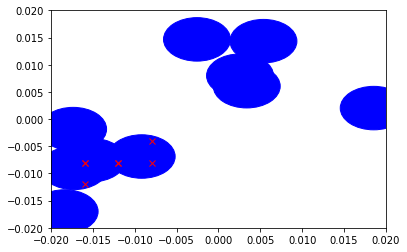

[[0.004      0.004      0.00126491 0.00126491 0.0004     0.0004
  0.00126491 0.004      0.004      0.004     ]
 [0.004      0.004      0.004      0.004      0.004      0.004
  0.004      0.004      0.004      0.004     ]]


In [46]:
import numpy as np
import matplotlib.pyplot as plt 
from matplotlib.animation import FuncAnimation
from scipy.optimize import curve_fit 
import datetime
from IPython.display import HTML
#from functions import *

dx = 0.004 #[mm]
dt = 0.01  #[s]

n = 10      #number of tumors
L = 0.02    #focus_le

N=2
M=10

t_centers = np.random.uniform(-L, L,(n,2))
t_area = dx**2*np.pi   #area of tumor
t_coeff = np.ones(n)*0.1

t , pos = bm_2d(N, M, 0.5, 0.5, dt, dx)

hits, dx_array = t_hits_2test(pos,t_centers,t_area,t_coeff,n,N,M,dx)

fig, ax = plt.subplots()
for i in range(0, n):
    ax.add_patch(plt.Circle((t_centers[i][0], t_centers[i][1]), np.sqrt(t_area/np.pi), color='b'))
plt.plot(hits[0],hits[1], marker='x',color='r',linestyle= 'None')
plt.xlim(-L,L)
plt.ylim(-L,L)    
plt.show()
print(dx_array)

(1000, 1000)
1.0


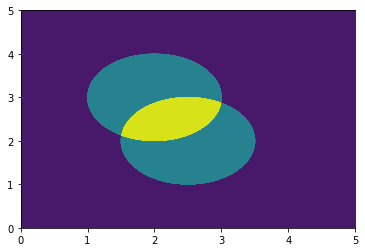

In [15]:
import matplotlib.pyplot as plt
import numpy as np
 
#tumor bio A 
r_a = 1
S_xa, S_ya = 2, 3    

#tumor bio A 
r_b = 1
S_xb, S_yb = 2.5, 2    
  
x = np.linspace(0, 5, 1000)
y = np.linspace(0, 5, 1000)
X, Y = np.meshgrid(x, y)
Z = np.zeros((len(y), len(x)))
Z_mod = np.where(np.sqrt((X-S_xa)**2+(Y-S_ya)**2) <= r_a, Z+1, Z)
Z_mod = np.where(np.sqrt((X-S_xb)**2+(Y-S_yb)**2) <= r_b, Z_mod+1, Z_mod)


virrevandrere = ["A", "B", "C"]
for i in virrevandrere:
    pos_x = pos[i][0]
    pos_y = pos[i][1]
    
    print(np.shape(Z_mod))
    print(Z_mod[xinx][yindx])
h = plt.contourf(X, Y, Z_mod)
Z_mod[px = ]


plt.show()

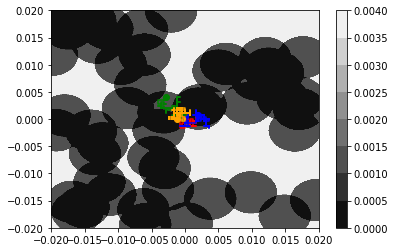

In [16]:
import numpy as np
import matplotlib.pyplot as plt 
#from functions import *

dx = 0.004 #[mm]
dt = 0.01  #[s]

n = 50      #number of tumors
L = 0.02   #focus_le
steps = 1001
stepsize = 2*L/steps

N=4
M=100

pu=0.5
pr=0.5

x =np.linspace(-L,L,steps)
y =np.linspace(-L,L,steps)
xv,yv = np.meshgrid(x,-y,indexing='xy')

def create_tumors(xv,yv,N,M,n,L,dx,dt):
    
    dx_arr=(xv**0+yv**0)*dx/2

    t_centers = np.random.uniform(-L, L,(n,2))
    t_area = dx**2*np.pi   #area of tumor
    t_coeff = np.ones(n)*0.1
    t_radius = np.sqrt(t_area/np.pi)
    inside = []
    for i in range(0,n):
        inside.append(np.sqrt((xv-t_centers[i][0])**2+(yv-t_centers[i][1])**2)<=t_radius)
        dx_arr[inside[i]]*=np.sqrt(t_coeff[i])
    return dx_arr

dx_arr = create_tumors(xv, yv, N, M, n, L, dx, dt)
plt.contourf(xv,yv,dx_arr, cmap = plt.get_cmap('gray'))    
plt.colorbar()
#plt.contourf(xv,yv,dx_arr, cmap = plt.gray()) 
def ind(pos,stepsize=1001):
    return int((pos+L)/stepsize)

def bm_step(pos,xv,yv,N,pu,pr,dt,dx): 

    rand_hv = np.random.choice([0,1],[N], p=[1-pu,pu]) 
    rand_ud = np.random.choice([-1,1],[N], p=[1-pr,pr]) 
    rand_lr = np.random.choice([-1,1],[N], p=[1-pr,pr])
    mod_ud=np.zeros(N)
    mod_lr=np.zeros(N)
    hits = []
    for i in np.arange(0,N):
        if rand_hv[i]==1: rand_lr[i]=0
        if rand_hv[i]==0: rand_ud[i]=0
        mod_ud[i] = rand_ud[i]*dx_arr[ind(pos[i][0])][ind(pos[i][1])]
        mod_lr[i] = rand_lr[i]*dx_arr[ind(pos[i][0])][ind(pos[i][1])]
        if dx_arr[ind(pos[i][0])][ind(pos[i][1])] != 0.004:
            #print(ind(pos[i][0]))
            #print(ind(pos[i][1]))
            hits.append([pos[i][0],pos[i][1]])
            #print(hits[-1])
        
    pos_change=np.array([mod_lr,mod_ud])
    pos=pos + pos_change.T
    return pos, np.array(hits)

def bm_different_dx(M,N,xv,yv,pu,pr,dt,dx):
    hits=np.array([])
    t = np.arange(0,M*dt,dt);
    
    pos = np.zeros([M,N,2])
    for i in np.arange(1,M):
        pos[i], h = bm_step(pos[i-1],xv,yv,N,pu,pr,dt,dx)  
        if h.size>0:
            np.append(hits,h)
    return t, np.transpose(pos,(1,0,2)),np.array([hits])


t,pos,hits = bm_different_dx(M,N,x,y,pu,pr,dt,dx_arr)
t_centers = np.random.uniform(-L, L,(n,2))
t_area = dx**2*np.pi   #area of tumor
t_coeff = np.ones(n)*0.1

if hits.size>0:
    plt.plot(hits[0],hits[1], marker='x',color='r',linestyle= 'None')

colors = ['red','green','blue', 'orange']
for i in range(0,N):
    plt.plot(pos[i].T[0],pos[i].T[1],color=colors[i])
    plt.plot(pos[i][-1][0],pos[i][-1][1],marker='o',color=colors[i])

plt.show()


Oppgave 2 g)

In [1]:
import numpy as np


B = 10

matrix_a = np.matrix(f"1 {B}; 3 4")
print(matrix_a)


[[ 1 10]
 [ 3  4]]


In [4]:
g_x = np.matrix("1 0 -1; 2 0 -2; 1 0 -1")
g_y = np.matrix("1 2 1; 0 0 0; -1 -2 -1")

n = 5
m = 5

X = np.zeros((n-2, m-2))
Y = np.zeros((n-2, m-2))
S = np.zeros((n-2, m-2))

print(X)

# A_local is the Difusion intesity matrix aquired in f
#i and j are M and N, and give intensity value in one cell at a time 
#how the f am i supposed to matrix multiply it with a 3x3 matrix?

I 


for i in range(2, n-1):
    for j in range(2, m-1):
        A_local = np.array([I[i-1][j-1], I[i-1][j], I[i-1][j+1]], [I[i][j-1], I[i][j], I[i][j+1]], [I[i+1][j-1], I[i+1][j], I[i+1][j+1]])
       
        X[i-1][j-1] = np.sum(np.multiply(g_x, A_local))
        Y[i-1][j-1] = np.sum(np.multiply(g_y, A_local))
        S[i-1][j-1] = np.sqrt((X[i-1][j-1])**2 + (Y[i-1][j-1])**2)

#normalization of X, Y and S
X = X / np.max(X)
Y = Y / np.max(Y)
S = S / np.max(S)

[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


NameError: name 'I' is not defined